In [1]:
from becquerel import Spectrum
import numpy as np
import importlib
import sys
import matplotlib.pyplot as plt
sys.path.insert(0,r"C:\Users\benhu\Desktop\Research\radwatch-analysis")

import analysis_methods as am
import ROI
importlib.reload(am)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\benhu\\Desktop\\Research\\radwatch-analysis\\ROI.py'>

In [2]:
source_energies = np.array([605, 609, 662, 1460, 2614]);
spectrum = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\UCB1907PetraleSole.spe'
background = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe'
livetime = 172800 #s
wetweight = 492.4 #g
spec = Spectrum.from_file(spectrum)
bgspec = Spectrum.from_file(background)
counts = spec.counts_vals
energies = spec.bin_centers_kev

roi = ROI.ROI(spec, bgspec, source_energies, 0)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\UCB1907PetraleSole.spe
SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe


c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a fu

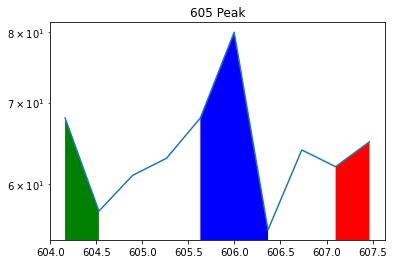

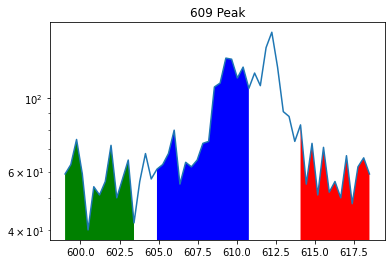

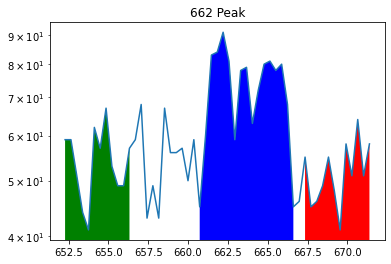

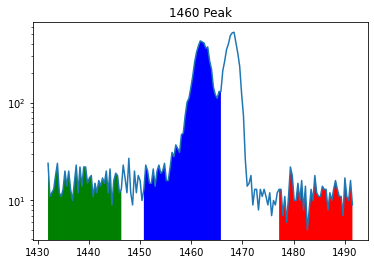

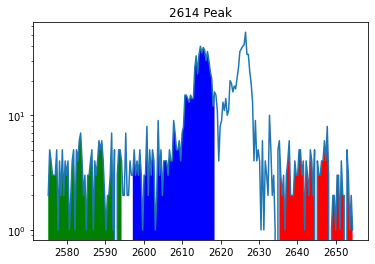

In [3]:
roi.set_sideband(605, 1, [[-2, -1], [-0.5, 1], [1, 2]])
roi.set_sideband(609, 5, [[-2, -1], [-0.85, 0.5], [1, 2]])
roi.set_sideband(662, 5, [[-2, -1], [-0.3, 1], [1, 2]])
roi.set_sideband(1460, 15, [[-2, -1], [-0.75, 0.3], [1, 2]])
roi.set_sideband(2614, 20, [[-2, -1], [-0.9, 0.2], [1, 2]])

roi.plot_peak_region(spec, source_energies, 605)
roi.plot_peak_region(spec, source_energies, 609)
roi.plot_peak_region(spec, source_energies, 662)
roi.plot_peak_region(spec, source_energies, 1460)
roi.plot_peak_region(spec, source_energies, 2614)

In [4]:
roi.find_peak_energies()
roi_counts, roi_unc = roi.get_counts()

eff_func = am.Efficiency()
eff_func.set_parameters()

efficiency = []
for i in source_energies:
    efficiency.append(eff_func.get_eff(i))

countrate = [i / livetime for i in roi_counts]
uncrate = [i / livetime for i in roi_unc]

print(efficiency)
print(countrate)
print(uncrate)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


background spec sidebands 118.67582597822604
bg peak counts 170.6798396091341
signal bg 126.0
signal peak 203.0
background spec sidebands 721.0556505362443
bg peak counts 1246.0961727713736
signal bg 768.0
signal peak 1493.0000000000002
background spec sidebands 590.0455392737645
bg peak counts 979.4089233821015
signal bg 634.5
signal peak 1227.0
background spec sidebands 583.7117171007692
bg peak counts 1318.76844822995
signal bg 555.5
signal peak 5226.0
background spec sidebands 167.0128899300316
bg peak counts 528.0407537907587
signal bg 171.0
signal peak 697.0
Loaded fit parameters 0-4: [-0.0530201  -0.23393142 -0.49270682 -1.0079565  -4.5553875 ]
Loaded input energies: []
Loaded energy uncertainties: [0.02016385 0.03079805 0.02757461 0.01707092 0.01090811 0.01032225]
[0.019812801529679906, 0.019742405309284897, 0.018854421202205197, 0.01051768041536737, 0.004697785950678424]
[0.00014465269889520806, 0.001157172903731892, 0.0011755591197434197, 0.022774555954113537, 0.0009546998619

In [6]:
sactivity, sactunc = [(i / j) / wetweight for i, j in zip(countrate, efficiency)], [(i / j) / wetweight for i, j in zip(uncrate, efficiency)]
for i, j, k in zip(source_energies, sactivity, sactunc):
    print("Specific activity at", i, "keV:", j, "±", k, "Bq/g (wet weight)")

Specific activity at 605 keV: 1.4827318195369862e-05 ± 1.3211159583357699e-05 Bq/g (wet weight)
Specific activity at 609 keV: 0.00011903649967467837 ± 3.513611911599318e-05 Bq/g (wet weight)
Specific activity at 662 keV: 0.0001266231828384232 ± 3.309390608687461e-05 Bq/g (wet weight)
Specific activity at 1460 keV: 0.004397561313720803 ± 9.42511379921475e-05 Bq/g (wet weight)
Specific activity at 2614 keV: 0.00041272007210328156 ± 9.340792656606691e-05 Bq/g (wet weight)
